Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE".

Do not edit or insert code into the test cells as all you insert will be overwritten by the automated testing code.

---

**Question 10**: Pinball scattering is a purely Newtonian equations of motion exercise without feedback or random numbers but showing chaotic behaviour regardless.

Consider the potential $$V(x,y)=x^{2}\,y^{2}\,e^{-\left(x^{2}+y^{2}\right)}$$ (all terms dimensionless) with four maxima centred at $x=\pm{}1$ and $y=\pm{}1$, respectively. It is defined as a repulsive potential for any test particle (the pinball) moving through that potential. The equations of motion to solve hence are $$\frac{d^{2}x(t)}{dt^{2}} = -2.0\,y^{2}\,x\,(1-x^{2})\,e^{-\left(x^{2}+y^{2}\right)}$$ and $$\frac{d^{2}y(t)}{dt^{2}} = -2.0\,x^{2}\,y\,(1-y^{2})\,e^{-\left(x^{2}+y^{2}\right)}.$$

**Task**: Solve these two coupled ODE's in stages: 

**(a)** write a function `trajectory(impactpar, speed)` which takes the impact parameter, $x(0)$, as input as well as the speed $v_{y}$ for initial conditions (impact parameter$=x(0)$, $v_{x}=\frac{dx(0)}{dt}$, $y(0)$ and $v_{y}=\frac{dy(0)}{dt}$ in that order). Calculate the time array to solve for from `np.linspace(0,maxtime,300)` where `maxtime` works well as `10 / speed`. The function shall return the trajectory, i.e. the arrays of solved x(t) and y(t) separately. **Plot** a trajectory of your choice, see below, with appropriate axes labels.

As initial values, fix $v_{x}=\frac{dx(0)}{dt}=0.0$ and $y(0)=-2$ (away from the potential in $y$). The range of sensible initial values for $x(0)$, should be between $-0.9\leq{}x(0)\leq{}0.9$ but values around $0.1-0.2$ are quite interesting to observe. Likewise, pick a kinetic energy in form of an initial speed $0<v_{y}=\frac{dy(0)}{dt}\leq{}0.5$.

**(b)** Write a function `scatterangles(allb, speed)` which takes an array of impact parameter from the interval $[-0.2, 0.2]$ with a step size of 0.001 as input as well as a speed value. Loop over the impact parameter values, solve the ODE's and determine the scatter angle. Again, as initial values, fix $v_{x}=\frac{dx(0)}{dt}=0.0$ and $y(0)=-2$. Fix the speed input value at $v_{y}=0.1$ when calling the `scatterangles(allb, speed)` function before plotting the result, see below.

That scatter angle is determined from the final value of velocity components, i.e. $\theta=\tan^{-1}(v_{y}/v_{x})$ at the maximum time value. Store the scatter angle at each loop iteration and return it as an array. **Plot** the scatter angle as a function of impact parameter with appropriate axes labels. Note that the imported python math function `atan2(y,x)` has the correct and safe return range of $-\pi\leq{}\theta\leq{}\pi$ since backscattering of the pinball can and will take place.

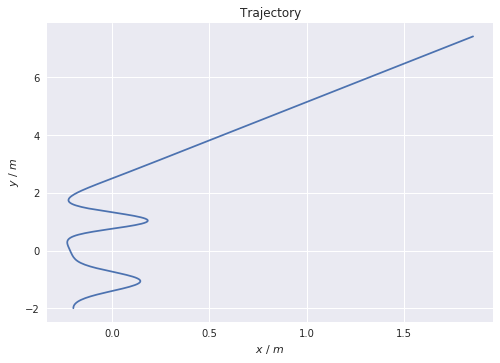

In [1]:
%matplotlib inline
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

initial_speed = 0.2
initial_x = -0.2
impact_parameters = np.array((initial_x, 0, -2))


def ode(t, y):
    f_0 = y[1]
    f_1 = - 2 * y[0] * y[2] ** 2 * (1 - y[0] ** 2) * np.exp(-(y[0] ** 2 + y[2] ** 2))
    f_2 = y[3]
    f_3 = - 2 * y[0] ** 2 * y[2] * (1 - y[2] ** 2) * np.exp(-(y[0] ** 2 + y[2] ** 2))
    return np.array((f_0, f_1, f_2, f_3))


def trajectory(impactpar, speed):
    time_values = np.linspace(0, 10 / speed, 300)
    initial_conditions = np.append(impactpar, speed)
    solved = odeint(ode, initial_conditions, time_values, tfirst=True)
    return solved[:, 0], solved[:, 2]


plt.style.use("seaborn")
xvals, yvals = trajectory(impact_parameters, initial_speed)
fig, ax = plt.subplots()
ax.plot(xvals, yvals)
ax.set_xlabel("$x$ / $m$")
ax.set_ylabel("$y$ / $m$")
ax.set_title("Trajectory")
plt.show()


In [ ]:
# Solution to part (b)
# YOUR CODE HERE

In [ ]:
# Test cell
speed = 0.1
b = 0.15
xoft, yoft = trajectory(b, speed)
assert (xoft[1]>0.145 and xoft[1]<0.149), 'wrong x(t)'
assert (yoft[1]>-1.97 and yoft[1]<-1.96), 'wrong y(t)'

In [ ]:
# Test cell
angle = scatterangles(np.array([b]), speed)
assert (angle[0]>2.8 and angle[0]<2.9), 'wrong scatter angle'

### Tests 3 marks; Style 1 mark; Plots - 3 marks